#### Libraries Import

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

#### Data Loading 

In [4]:
data = pd.read_csv(r"C:\Users\hp\Downloads\Amazon Sales data.csv")

#### Data Transformation

In [5]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Month'] = data['Order Date'].dt.month
data['Year'] = data['Order Date'].dt.year
data['Year_Month'] = data['Order Date'].dt.to_period('M')

#### Key Metrics and Analysis

In [6]:
monthly_sales = data.groupby('Year_Month')['Total Revenue'].sum()
yearly_sales = data.groupby('Year')['Total Revenue'].sum()

average_sales_per_month = data.groupby('Month')['Total Revenue'].mean()
max_sales_month = monthly_sales.idxmax()
min_sales_month = monthly_sales.idxmin()

print(f"Average Sales per Month: {average_sales_per_month.mean()}")
print(f"Month with Maximum Sales: {max_sales_month}")
print(f"Month with Minimum Sales: {min_sales_month}")

Average Sales per Month: 1272347.9095051892
Month with Maximum Sales: 2013-07
Month with Minimum Sales: 2015-08


#### Relationship Graph(Visualizations) 

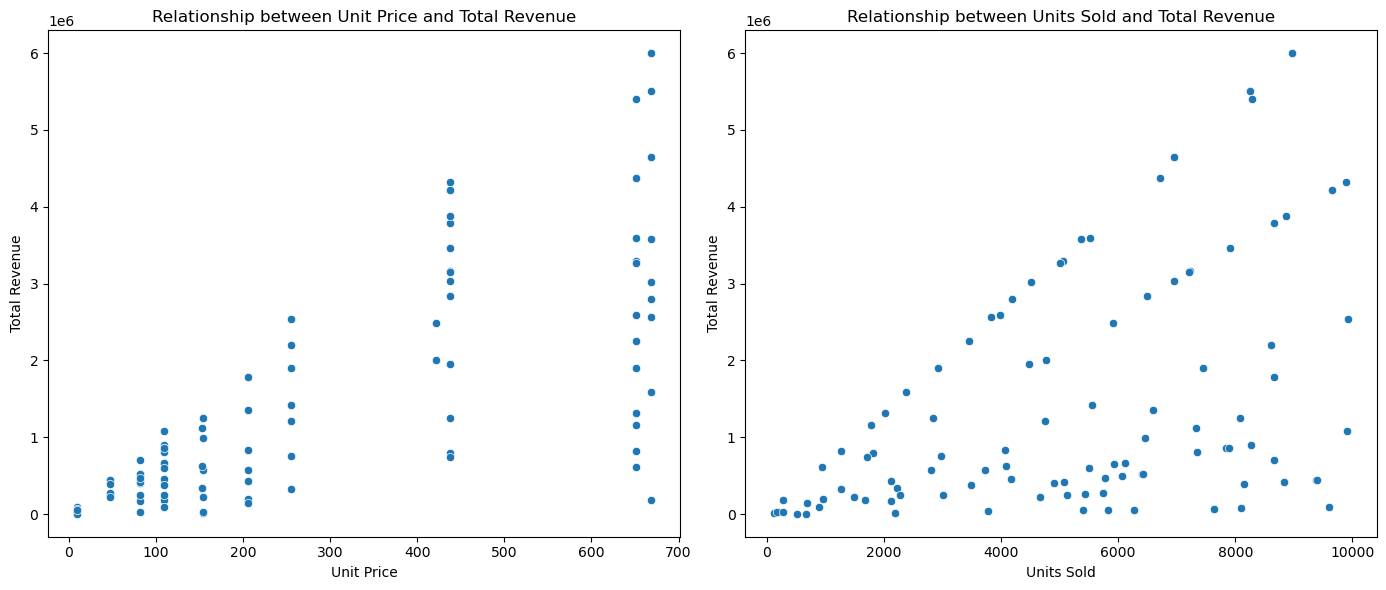

In [7]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='Unit Price', y='Total Revenue', data=data)
plt.title('Relationship between Unit Price and Total Revenue')

plt.subplot(1, 2, 2)
sns.scatterplot(x='Units Sold', y='Total Revenue', data=data)
plt.title('Relationship between Units Sold and Total Revenue')

plt.tight_layout()
plt.show()

#### Resampling and Preprocessing, Seasonal Decomposition, Original, Trend, and Seasonal Components

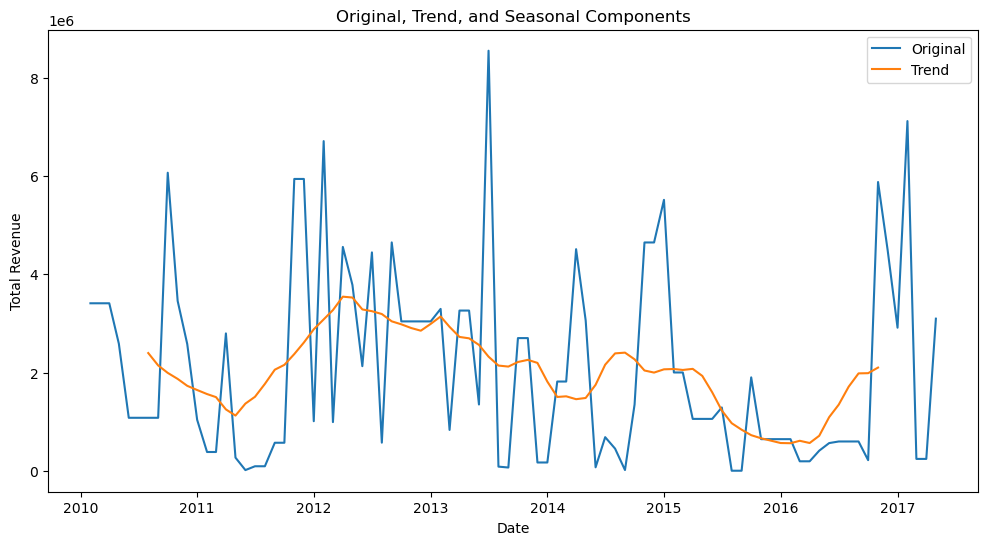

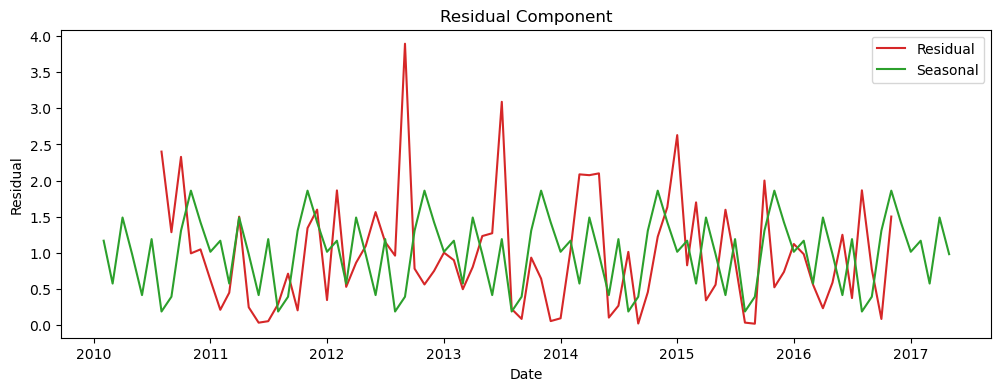

In [8]:
monthly_sales_resampled = monthly_sales.resample('M').sum()
constant_value = 0.001
monthly_sales_resampled += constant_value
monthly_sales_resampled.index = monthly_sales_resampled.index.to_timestamp()
monthly_sales_resampled = monthly_sales_resampled.ffill()

decomposition = seasonal_decompose(monthly_sales_resampled, model='multiplicative')

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_resampled, label='Original', color='tab:blue')
plt.plot(decomposition.trend, label='Trend', color='tab:orange')
plt.title('Original, Trend, and Seasonal Components')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.legend()
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(decomposition.resid, label='Residual', color='tab:red')
plt.plot(decomposition.seasonal, label='Seasonal', color='tab:green')
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.legend()
plt.show()

#### Monthly Trend Analysis

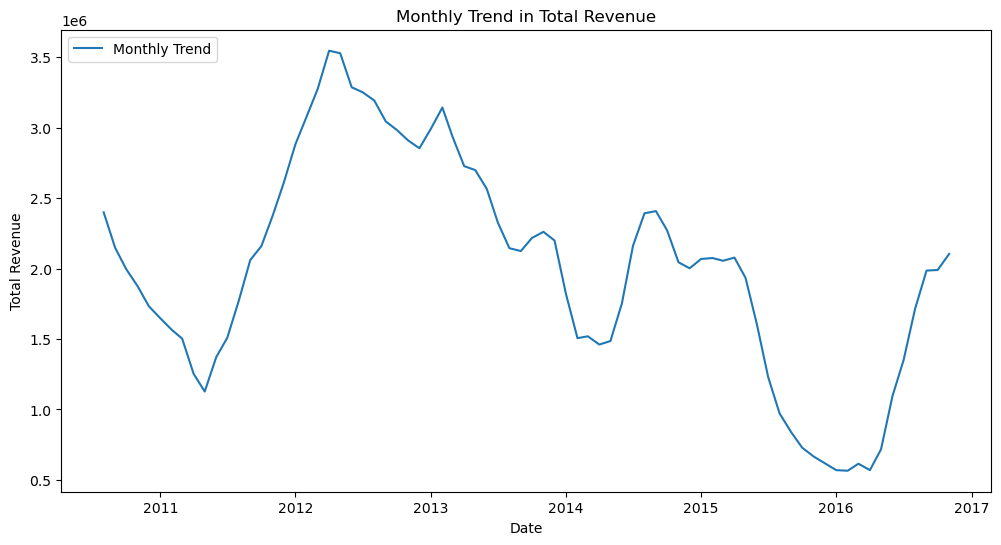

In [11]:
decomposition = seasonal_decompose(monthly_sales_resampled, model='multiplicative')
monthly_trend = decomposition.trend

# Plotting the monthly trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_trend, label='Monthly Trend')
plt.legend(loc='upper left')
plt.title('Monthly Trend in Total Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

#### Yearly Trend Analysis

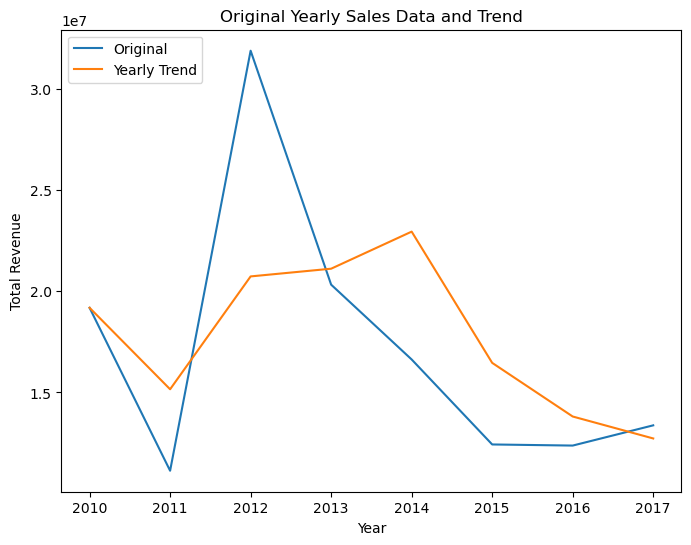

In [12]:
# Assuming 'Order Date' column is the timestamp of sales
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Year'] = data['Order Date'].dt.year

# Aggregate data on a yearly basis
yearly_data = data.groupby('Year')['Total Revenue'].sum()
yearly_data += 0.001  # Add a small constant to avoid zero and negative values

# Calculate a rolling average for the yearly trend
rolling_window = 3  # You can adjust the window size as needed
trend_yearly = yearly_data.rolling(window=rolling_window, min_periods=1).mean()

plt.figure(figsize=(8, 6))

# Plotting both the original yearly sales data and the trend component
plt.plot(yearly_data, label='Original')
plt.plot(trend_yearly, label='Yearly Trend')
plt.legend(loc='upper left')
plt.title('Original Yearly Sales Data and Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()